# **Introduction**

The purpose of this data is for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.

#**More about the data**

Number of attributes : 17

Number of rows : 2111

#**Independent Variables**

Gender - (Male/Female)

Age - In years

Height - In meters

Weight - In Kgs

family_history_with_overweight - Family history in obesity - Yes or No

FAVC - Frequent consumption of high caloric food - Yes/No

FCVC - Frequency of consumption of vegetables - 1 = never, 2 = sometimes, 3 = always

NCP - Number of main meals - 1, 2, 3 or 4 meals

CAEC - Consumption of food between meals - No, Sometimes, Frequently, Always

Smoke - Does the person smoke - Yes/No

CH20 - Consumption of water daily - 1 = less than a liter, 2 = 1–2 liters, 3 = more than 2 liters

SCC - Calories consumption monitoring - Yes/No

FAF - Physical activity frequency - 0 = none, 1 = 1 to 2 days, 2= 2 to 4 days, 3 = 4 to 5 days

TUE - Time using technology devices - 0 = 0–2 hours, 1 = 3–5 hours, 2 = more than 5 hours

CALC - Consumption of alcohol - No, Sometimes, Frequently and Always

MTRANS - Transportation used - Public Transportation, Motorbike, Bike, Automobile and Walking

# **Dependent Variables**

**NObeyesdad** - Obesity level - Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III


In [ ]:
#importing the libraries 
import numpy as np # linear algebra
import pandas as pd # data processing with CSV 
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy.stats as stats
import pylab
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [ ]:
#Reading the Dataset and Displaying the head of it.
data=pd.read_csv("/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv", sep = ",")
#data2=pd.read_csv("/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv", sep = ",")
data.name = "data"
data.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


#What are the data types?¶

In [ ]:
#Data types of the columns present in the DataSet
data.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

Gender - Categorical

Age - Numeric

Height - Numeric

Weight - Numeric

family_history_with_overweight - Categorical

FAVC - Categorical

FCVC - Categorical

NCP - Categorical

CAEC - Categorical

SMOKE - Categorical

CH2O - Categorical

SCC - Categorical

FAF - Categorical

TUE - Categorical

CALC - Categorical

MTRANS - Categorical

NObeyesdad - Categorical



#Are there missing values?


In [ ]:
# We need to check missing values in dataset
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
data.replace([np.inf, -np.inf], np.nan)

data.dropna(inplace=True)
#Looking for Infinite values to replace them with nans so that it will become easir to drop them.

In [ ]:
# To check duplicated values 
print(data.duplicated().value_counts()) 

False    2087
True       24
dtype: int64


In [ ]:
# Remove row of missing value
data.dropna(inplace=True)

In [ ]:
data = data.drop_duplicates()
#Dropping the dupicate values, as seen above we have 24 duplicate vaues

In [ ]:
# To check duplicated values 
print(data.duplicated().value_counts()) 

False    2087
dtype: int64


In [ ]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


**What are the distribution of the output variable?**


In [ ]:
# Lets count numbers of row for 'NObeyesdad' types
data.groupby("NObeyesdad").size()

NObeyesdad
Insufficient_Weight    267
Normal_Weight          282
Obesity_Type_I         351
Obesity_Type_II        297
Obesity_Type_III       324
Overweight_Level_I     276
Overweight_Level_II    290
dtype: int64

In [ ]:
data['NObeyesdad'].value_counts()/data.shape[0]
#probable distribution for NObeyesdad types

Obesity_Type_I         0.168184
Obesity_Type_III       0.155247
Obesity_Type_II        0.142310
Overweight_Level_II    0.138955
Normal_Weight          0.135122
Overweight_Level_I     0.132247
Insufficient_Weight    0.127935
Name: NObeyesdad, dtype: float64

**We can see that from below all values of the output variable are equally distributes.**

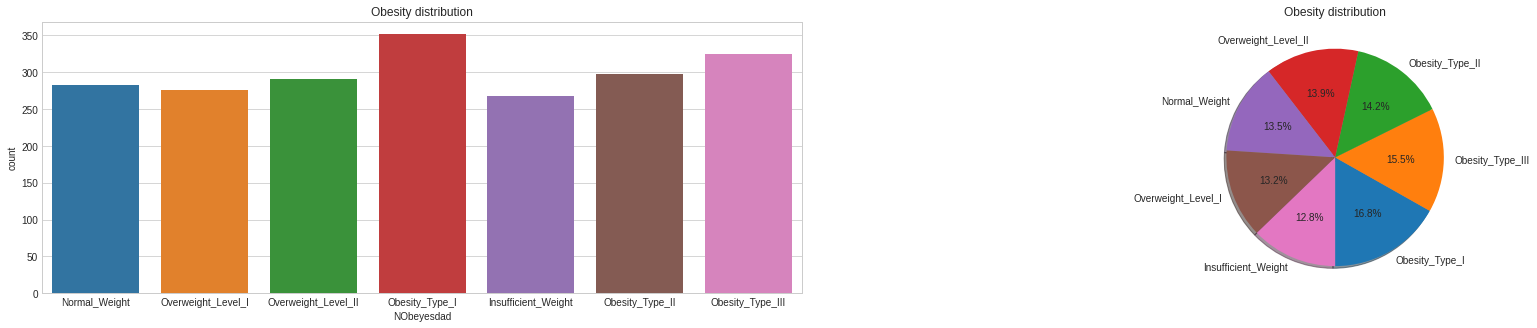

In [ ]:
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
sns.countplot(x='NObeyesdad',data=data)
plt.title("Obesity distribution")
plt.subplot(1,2,2)
labels =data['NObeyesdad'].value_counts(sort = True).index
sizes = data['NObeyesdad'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Obesity distribution',size = 12)
plt.show()
#bar and pie plotting NObeyesdad types to better understand their distribution.

**What are the likely distributions of the numeric variables?**

Most of our data is categorical with the exception of age, height and weight. We can look at their distribution in our dataset.

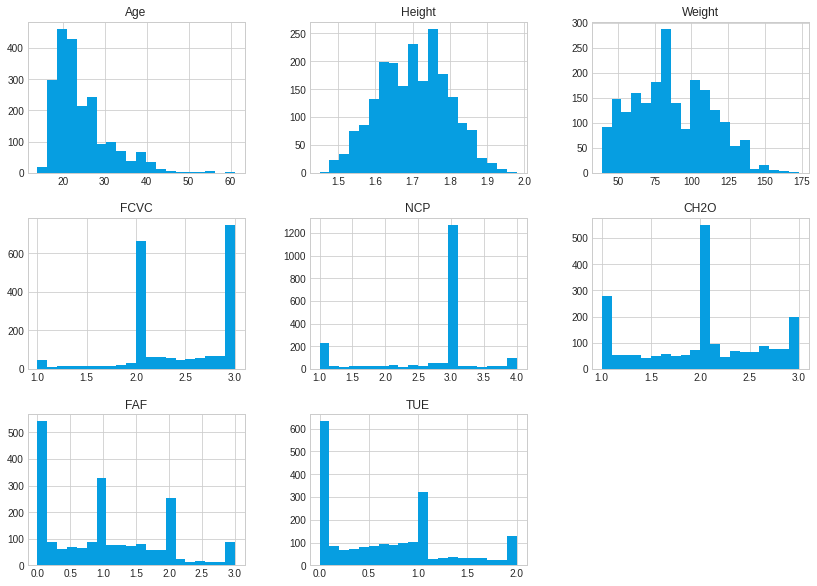

In [ ]:
plt.style.use('seaborn-whitegrid')
#histogram plotting all numeric variables to see their distribution.
data.hist(bins=20, figsize=(14,10), color='#069EE1')
plt.show();

From above hist plots and below q-q plots we can suggest that the distribution for age, weight and height is seems normal distribution while rest are not.

<Figure size 576x360 with 0 Axes>

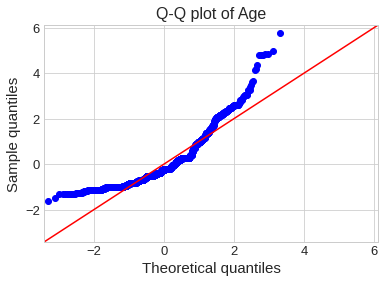

<Figure size 576x360 with 0 Axes>

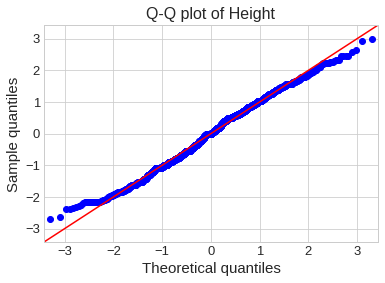

<Figure size 576x360 with 0 Axes>

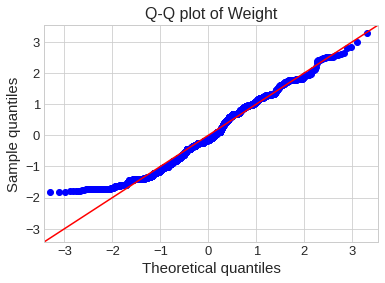

<Figure size 576x360 with 0 Axes>

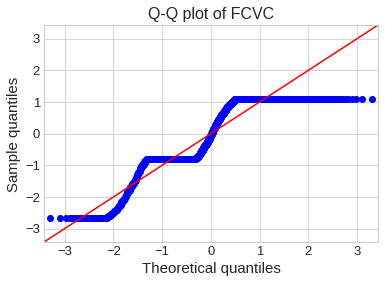

<Figure size 576x360 with 0 Axes>

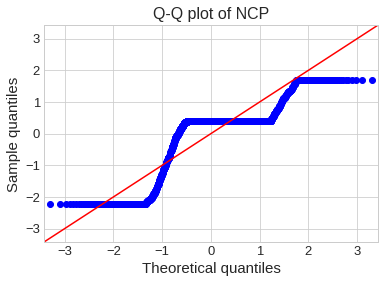

<Figure size 576x360 with 0 Axes>

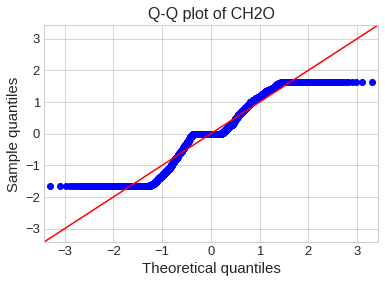

<Figure size 576x360 with 0 Axes>

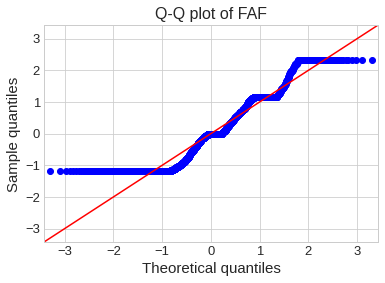

<Figure size 576x360 with 0 Axes>

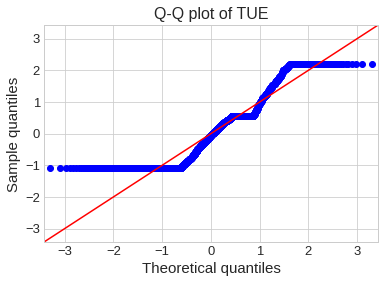

In [ ]:
#checking the distribution of independent variables
#Q-Qplots to better understand the distribution of the numeric variables.
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

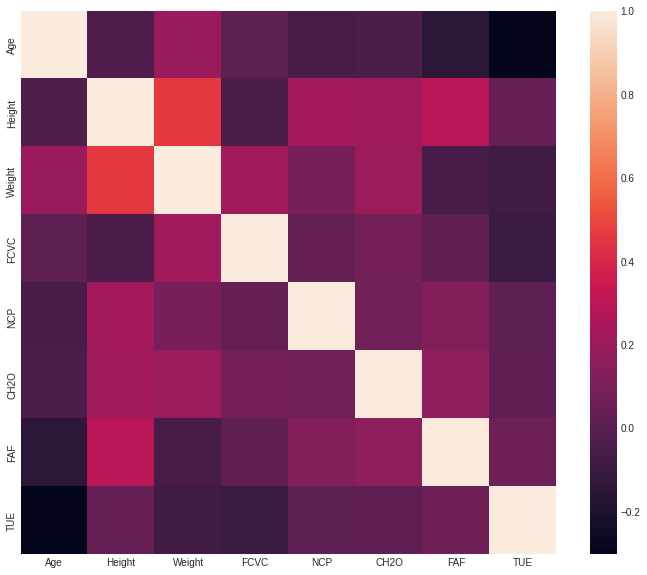

In [ ]:
#Using Pearson Correlation
#Correlation matrix to better understand the relationship btw differnt numeric variables.
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor)
plt.show()

In [ ]:
obesity_numeric = data[["Age", "Height", "Weight", "FCVC", "CH2O", "FAF", "TUE"]]

**Handling outliers**

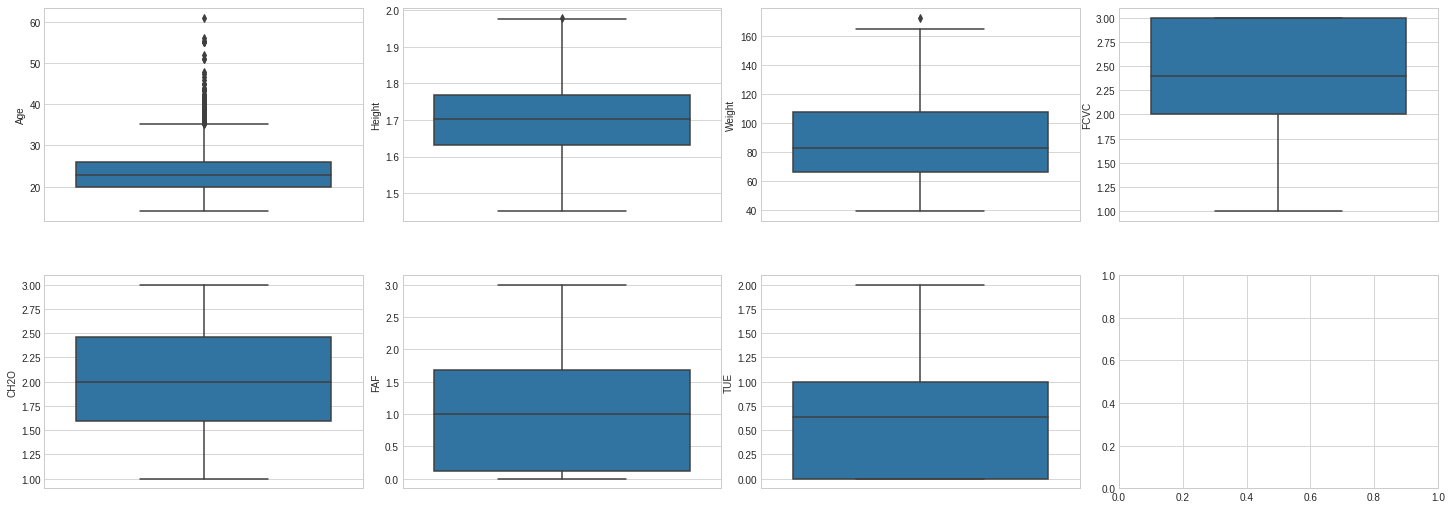

In [ ]:
fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize = (20, 7))
# fig.delaxes(axs[1][3])
#Box plotting the numeric variables to check for outliers.
idx = 0
axs = axs.flatten()
for k, v in obesity_numeric.items():
    sns.boxplot(y = k, data = obesity_numeric, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

from looking at above box plots we can see that there are very few outliers that to like age's outliers are from 40 to 60 which is pretty much common and same for weight as well 170 is pretty common weight so from above.

so we can safely suggest from above that there is no need to remove the outliers.

**Creating dummies for categorical variables.**

In [ ]:
data = pd.get_dummies(data)
#creating dummies for the catergorical variables.

In [ ]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,...,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035,0.495927,0.504073,...,0.005271,0.746526,0.026354,0.127935,0.135122,0.168184,0.142310,0.155247,0.132247,0.138955
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153,0.500103,0.500103,...,0.072426,0.435104,0.160223,0.334097,0.341936,0.374119,0.349451,0.362227,0.338841,0.345983
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


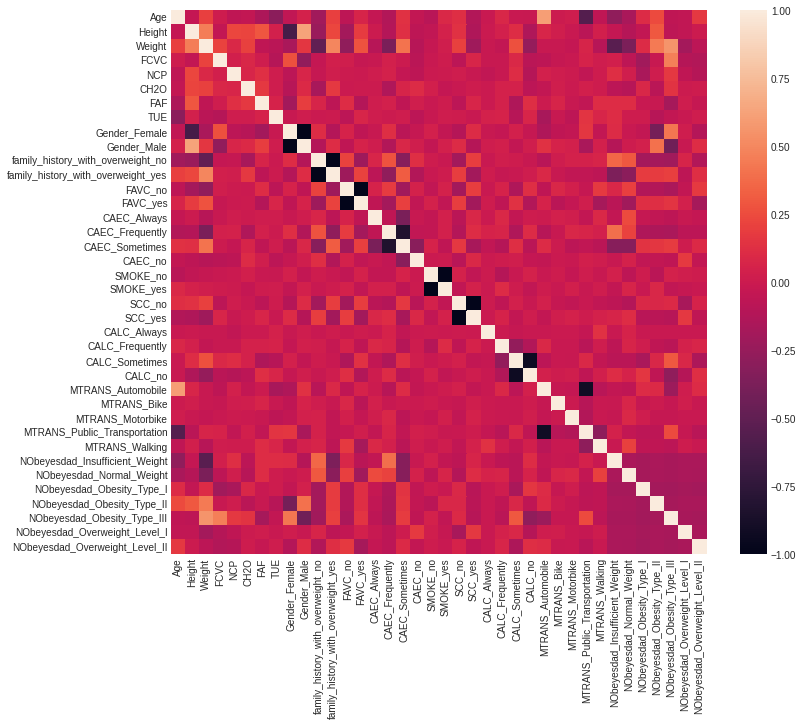

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor)
plt.show()

In [ ]:
data.corr()["NObeyesdad_Insufficient_Weight"].sort_values(ascending=False)
#checking correlation of each o/p types to different variables.

NObeyesdad_Insufficient_Weight        1.000000
CAEC_Frequently                       0.393214
family_history_with_overweight_no     0.359897
NCP                                   0.121046
FAF                                   0.117037
TUE                                   0.116324
CALC_no                               0.111052
Gender_Female                         0.104975
FAVC_no                               0.084583
SCC_yes                               0.066550
MTRANS_Public_Transportation          0.051701
SMOKE_no                              0.046224
FCVC                                  0.038218
CALC_Always                          -0.008386
MTRANS_Walking                       -0.009282
CAEC_no                              -0.018845
MTRANS_Bike                          -0.022220
MTRANS_Motorbike                     -0.027881
Height                               -0.037419
MTRANS_Automobile                    -0.042833
CAEC_Always                          -0.043591
SMOKE_yes    

In [ ]:
data.corr()["NObeyesdad_Normal_Weight"].sort_values(ascending=False)
#checking correlation of each o/p types to different variables.

NObeyesdad_Normal_Weight              1.000000
family_history_with_overweight_no     0.297690
CAEC_Always                           0.248023
CAEC_Frequently                       0.217360
MTRANS_Walking                        0.206226
FAVC_no                               0.197370
SCC_yes                               0.113935
FAF                                   0.110695
MTRANS_Motorbike                      0.087373
MTRANS_Bike                           0.074040
SMOKE_yes                             0.068829
CALC_Frequently                       0.066495
CALC_Always                           0.055393
CALC_no                               0.055001
CAEC_no                               0.053112
NCP                                   0.024327
TUE                                   0.009277
Gender_Male                           0.007994
Gender_Female                        -0.007994
MTRANS_Public_Transportation         -0.043565
MTRANS_Automobile                    -0.059752
FCVC         

In [ ]:
data.corr()["NObeyesdad_Obesity_Type_I"].sort_values(ascending=False)
#checking correlation of each o/p types to different variables.

NObeyesdad_Obesity_Type_I             1.000000
family_history_with_overweight_yes    0.183412
CALC_no                               0.161518
CAEC_Sometimes                        0.147595
FAVC_yes                              0.119296
Age                                   0.108179
MTRANS_Automobile                     0.103261
Weight                                0.103232
SCC_no                                0.086506
CH2O                                  0.079462
Gender_Male                           0.046300
MTRANS_Motorbike                      0.020346
CALC_Frequently                       0.015847
SMOKE_no                              0.012485
TUE                                   0.010137
CALC_Always                          -0.009845
SMOKE_yes                            -0.012485
FAF                                  -0.013735
CAEC_Always                          -0.023726
MTRANS_Bike                          -0.026085
Height                               -0.042812
Gender_Female

In [ ]:
data.corr()["NObeyesdad_Obesity_Type_II"].sort_values(ascending=False)
#checking correlation of each o/p types to different variables.

NObeyesdad_Obesity_Type_II            1.000000
Weight                                0.442523
Gender_Male                           0.398544
Height                                0.302215
Age                                   0.248261
family_history_with_overweight_yes    0.183924
CAEC_Sometimes                        0.160148
FAVC_yes                              0.117936
MTRANS_Automobile                     0.099925
SMOKE_yes                             0.083423
SCC_no                                0.082897
CALC_Sometimes                        0.080017
NCP                                   0.023113
MTRANS_Bike                           0.000091
CALC_Always                          -0.008919
FAF                                  -0.019551
FCVC                                 -0.022997
MTRANS_Motorbike                     -0.029651
CAEC_no                              -0.044331
CAEC_Always                          -0.048317
CALC_no                              -0.058128
MTRANS_Walkin

In [ ]:
data.corr()["NObeyesdad_Obesity_Type_III"].sort_values(ascending=False)
#checking correlation of each o/p types to different variables.

NObeyesdad_Obesity_Type_III           1.000000
Weight                                0.557996
FCVC                                  0.463916
Gender_Female                         0.429553
CALC_Sometimes                        0.304048
MTRANS_Public_Transportation          0.246757
family_history_with_overweight_yes    0.197368
CAEC_Sometimes                        0.180804
NCP                                   0.167579
FAVC_yes                              0.151496
CH2O                                  0.143624
SCC_no                                0.094134
SMOKE_no                              0.053703
CALC_Always                          -0.009386
MTRANS_Bike                          -0.024869
MTRANS_Motorbike                     -0.031205
TUE                                  -0.041186
SMOKE_yes                            -0.053703
CAEC_no                              -0.057593
Age                                  -0.057736
CAEC_Always                          -0.069200
Height       

In [ ]:
data.corr()["NObeyesdad_Overweight_Level_I"].sort_values(ascending=False)
#checking correlation of each o/p types to different variables.

NObeyesdad_Overweight_Level_I         1.000000
CAEC_no                               0.172640
SCC_yes                               0.164104
CALC_Sometimes                        0.082181
family_history_with_overweight_no     0.069739
CALC_Frequently                       0.052971
FAVC_yes                              0.044699
SMOKE_no                              0.027754
MTRANS_Bike                           0.026281
Gender_Female                         0.022983
FAF                                   0.021442
MTRANS_Automobile                     0.019495
MTRANS_Walking                        0.015244
CAEC_Sometimes                        0.012127
CH2O                                  0.003999
CALC_Always                          -0.008547
MTRANS_Motorbike                     -0.008883
TUE                                  -0.012167
CAEC_Always                          -0.018063
Gender_Male                          -0.022983
MTRANS_Public_Transportation         -0.026147
SMOKE_yes    

In [ ]:
data.corr()["NObeyesdad_Overweight_Level_II"].sort_values(ascending=False)
#checking correlation of each o/p types to different variables.

NObeyesdad_Overweight_Level_II        1.000000
FAVC_no                               0.173763
Age                                   0.166807
family_history_with_overweight_yes    0.119312
CALC_no                               0.119247
Gender_Male                           0.113092
MTRANS_Automobile                     0.102701
CAEC_Sometimes                        0.096532
CALC_Frequently                       0.071347
SCC_no                                0.061761
TUE                                   0.022622
CH2O                                  0.013465
SMOKE_no                              0.010742
Height                                0.004629
CALC_Always                          -0.008796
MTRANS_Motorbike                     -0.010111
SMOKE_yes                            -0.010742
MTRANS_Walking                       -0.014204
MTRANS_Bike                          -0.023305
FAF                                  -0.025772
CAEC_Always                          -0.038431
CAEC_no      

In [ ]:
def corrFilter(bound: float):
    xCorr = data.corr()
    data_corr_Filtered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    data_corr_Flattened = data_corr_Filtered.unstack().sort_values().drop_duplicates()
    return data_corr_Flattened
corrFilter(0.3)
#checking for overall correlation between all the variables.

family_history_with_overweight_no   family_history_with_overweight_yes   -1.000000
SMOKE_yes                           SMOKE_no                             -1.000000
SCC_yes                             SCC_no                               -1.000000
Gender_Male                         Gender_Female                        -1.000000
CALC_Sometimes                      CALC_no                              -0.924964
MTRANS_Automobile                   MTRANS_Public_Transportation         -0.907426
CAEC_Sometimes                      CAEC_Frequently                      -0.829896
Gender_Female                       Height                               -0.626748
MTRANS_Public_Transportation        Age                                  -0.555532
Weight                              NObeyesdad_Insufficient_Weight       -0.538964
family_history_with_overweight_no   Weight                               -0.492969
NObeyesdad_Obesity_Type_III         Gender_Male                          -0.429553
Gend

#**Insights**

From above corr matrix and indiviual corr values we can draw below insigts that.

**NObeyesdad** values are highly correlated to below variables.

1.Gender

2.Age

3.Height

4.Weight

5.Family history with overweight

6.FCVC

7.MTRANS

8.CALC

9.CAEC



In [ ]:
data2=pd.read_csv("/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv", sep = ",")

In [ ]:
data2 = data2.drop_duplicates()

In [ ]:
# To check duplicated values 
print(data.duplicated().value_counts()) 

False    2087
dtype: int64


In [ ]:
# create dummy variables
data2 = pd.get_dummies(data2,columns=["Gender","family_history_with_overweight",
                                          "CAEC","CALC","MTRANS","FAVC","SMOKE","SCC"])
data2.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,FAVC_no,FAVC_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,1,...,0,0,1,0,1,0,1,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,1,...,0,0,1,0,1,0,0,1,0,1
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,0,...,0,0,1,0,1,0,1,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,0,...,0,0,0,1,1,0,1,0,1,0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,0,...,0,0,1,0,1,0,1,0,1,0


In [ ]:
# split dataset in features and target variable

# Features
x = data2.drop(columns=["NObeyesdad"])

# Target variable
y = data2['NObeyesdad'] 

In [ ]:
# Import SelectKBest, chi2(score function for classification), f_regression (score function for regression)
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [ ]:
# Create the object for SelectKBest and fit and transform the classification data
# k is the number of features you want to select [here it's 2]
from sklearn.feature_selection import SelectKBest, f_classif
#X_clf_new = SelectKBest(score_func=chi2,k=10).fit_transform(X_clf,y_clf)
# Create and fit selector
selector = SelectKBest(f_classif, k=10)
selector.fit(x, y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = x.iloc[:,cols]

In [ ]:
print(features_df_new)
#below are the 10 most important features for our model.

            Age      Weight  FCVC  Gender_Female  Gender_Male  \
0     21.000000   64.000000   2.0              1            0   
1     21.000000   56.000000   3.0              1            0   
2     23.000000   77.000000   2.0              0            1   
3     27.000000   87.000000   3.0              0            1   
4     22.000000   89.800000   2.0              0            1   
...         ...         ...   ...            ...          ...   
2106  20.976842  131.408528   3.0              1            0   
2107  21.982942  133.742943   3.0              1            0   
2108  22.524036  133.689352   3.0              1            0   
2109  24.361936  133.346641   3.0              1            0   
2110  23.664709  133.472641   3.0              1            0   

      family_history_with_overweight_no  family_history_with_overweight_yes  \
0                                     0                                   1   
1                                     0                      

#**Select K best Insights**

best variables to predict **NObeyesdad** are as below.

1.Age 

2.Weight

3.FCVC

4.Gender

5.family_history_with_overweight

6.CAEC

7.CALC

#**Conculsion**

From above analysis we will be taking these below 9 variables in to considerationa and dropping rest of the columns.

1.Gender

2.Age

3.Height

4.Weight

5.Family history with overweight

6.FCVC

7.MTRANS

8.CALC

9.CAEC
